In [1]:
import matplotlib.pyplot as plt
import numpy as np

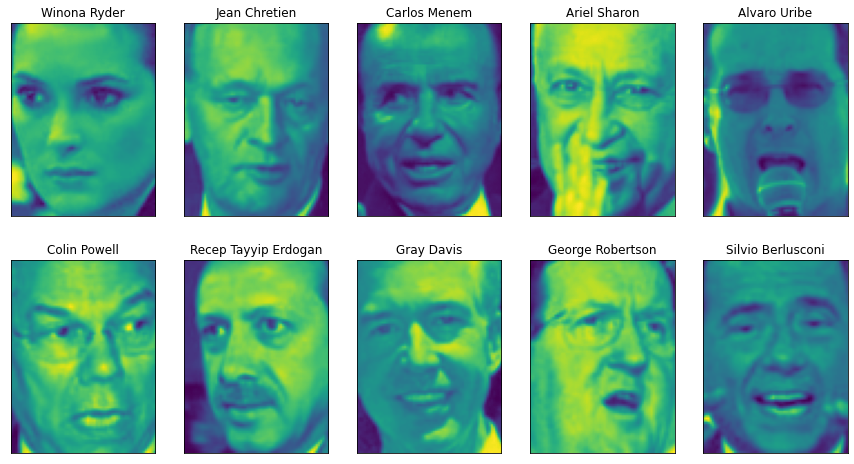

In [8]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20,resize=0.7)
image_shape = people.images[0].shape

fix, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
  ax.imshow(image)
  ax.set_title(people.target_names[target])

In [9]:
image_shape

(87, 65)

In [12]:
print("people.image.shape :{}".format(people.images.shape))
print("Number of classes :{}".format(len(people.target)))

people.image.shape :(3023, 87, 65)
Number of classes :3023


In [20]:
counts = np.bincount(people.target)
for i, (count, name) in enumerate(zip(counts, people.target_names)):
  print("{0:25} {1:3}".format(name,count), end='   ')
  if (i + 1) % 3==0:
    print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin                20 

In [14]:
counts

array([ 39,  35,  21,  36,  20,  77,  42,  24,  29,  21, 236,  31, 121,
        22, 530, 109,  44,  26,  30,  22,  39,  71,  20,  28,  52,  55,
        21,  42,  21,  24,  20,  53,  31,  23,  28,  60,  32,  41,  22,
        41,  48,  29,  33,  20,  22,  37,  20,  22,  30,  27,  32,  26,
        23,  52,  33,  23,  25,  33, 144,  32,  49,  24])

In [18]:
people.target_names.shape

(62,)

In [41]:
mask = np.zeros(people.target.shape, dtype=bool)
for target in np.unique(people.target):
  mask[np.where(people.target == target)[0][:50]] = 1

  X_people = people.data[mask]
  y_people = people.target[mask]
  
  X_people = X_people / 255.

In [42]:
X_people.shape

(2063, 5655)

In [43]:
y_people.shape

(2063,)

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

In [52]:
2063*0.75

1547.25

In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


print("X_train_pca_shape: {}".format(X_train_pca.shape))
print("pca_components_shape: {}".format(pca.components_.shape))

X_train_pca_shape: (1547, 100)
pca_components_shape: (100, 5655)


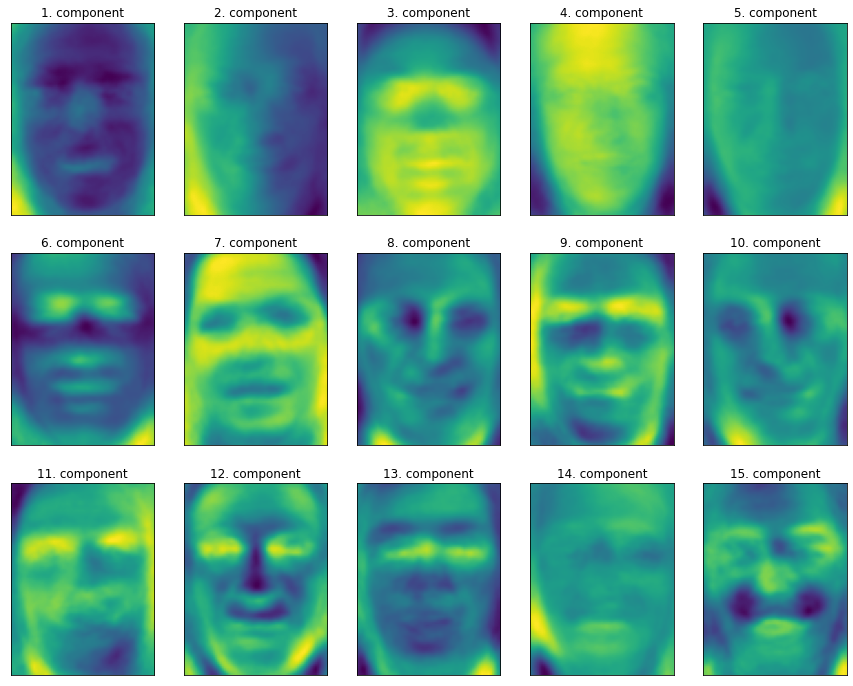

In [55]:
fix, axes = plt.subplots(3, 5, figsize=(15,12), subplot_kw={'xticks': (), 'yticks': ()})

for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
  ax.imshow(component.reshape(image_shape), cmap='viridis')
  ax.set_title("{}. component".format((i + 1)))

In [61]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=100, random_state=0).fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)


print("X_train_pca_shape: {}".format(X_train_nmf.shape))
print("pca_components_shape: {}".format(nmf.components_.shape))

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


X_train_pca_shape: (1547, 100)
pca_components_shape: (100, 5655)


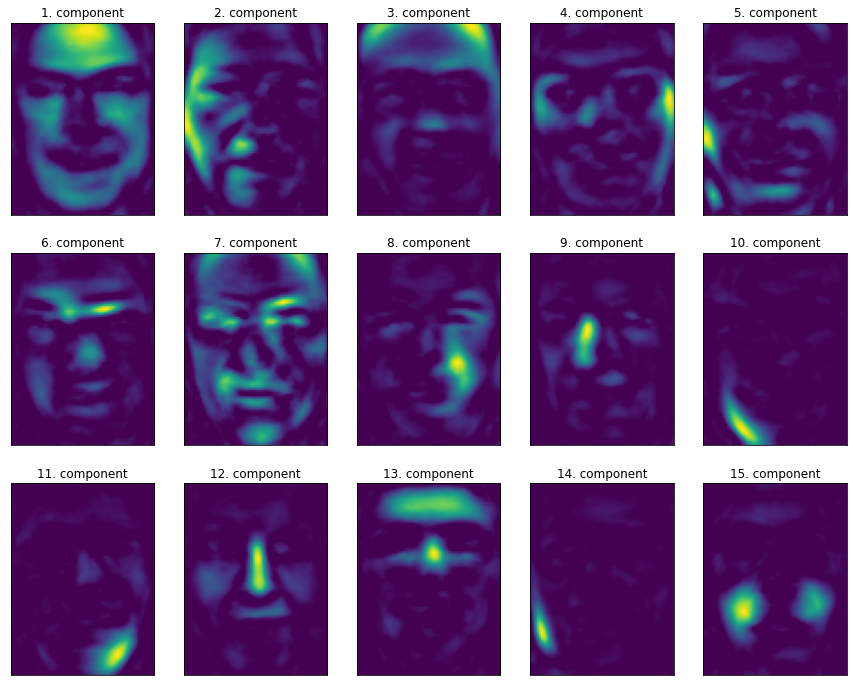

In [62]:
fix, axes = plt.subplots(3, 5, figsize=(15,12), subplot_kw={'xticks': (), 'yticks': ()})

for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
  ax.imshow(component.reshape(image_shape), cmap='viridis')
  ax.set_title("{}. component".format((i + 1)))